In [34]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from scipy.stats.stats import kendalltau
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
from sklearn.metrics import log_loss
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D, Conv1DTranspose
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import LSTM, Masking
from tensorflow.keras.layers import MaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import activations
sns.set()

In [35]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import pandas as pd
from scipy import *

train_values = np.empty(shape=[0, 222])
test_values = np.empty(shape=[0, 222])

train_sampled_all = glob.glob('./drive/MyDrive/compsci/train_sampled_all_220.csv')
# test_sampled_all = glob.glob('./drive/MyDrive/compsci/test_sampled_all_centered_220.csv')
test_unsampled_all = glob.glob('./drive/MyDrive/compsci/test_unsampled_all_220.csv')

for j in train_sampled_all:
    print('Loading ', j)
    csvrows = np.loadtxt(j, delimiter=',')
    train_values = np.append(train_values, csvrows, axis=0)
    
# for j in test_all:
#     print('Loading ', j)
#     csvrows = np.loadtxt(j, delimiter=',')
#     test_values = np.append(test_values, csvrows, axis=0)

for j in test_unsampled_all:
    print('Loading ', j)
    csvrows = np.loadtxt(j, delimiter=',')
    test_values = np.append(test_values, csvrows, axis=0)
    
print(train_values.shape)
print(test_values.shape)

Loading  ./drive/MyDrive/compsci/train_sampled_all_220.csv
Loading  ./drive/MyDrive/compsci/test_unsampled_all_220.csv
(31912, 222)
(37863, 222)


In [36]:
X_train = train_values[:,:-2]
X_test = test_values[:,:-2]

y_train = train_values[:,-2]
y_test = test_values[:,-2]

y_train_gc = (y_train - y_train.min())/(y_train.max()-y_train.min())*(9-1)
y_test_gc = (y_test - y_test.min())/(y_test.max()-y_test.min())*(9-1)

In [37]:

s = np.random.normal(0, 1, X_train.shape)
noise_train = X_train+s
print(noise_train.shape)

r = np.random.normal(0, 1, X_test.shape)
noise_test = X_test+r
print(noise_test.shape)

(31912, 220)
(37863, 220)


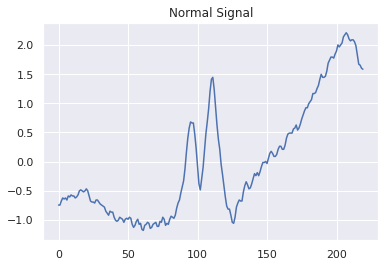

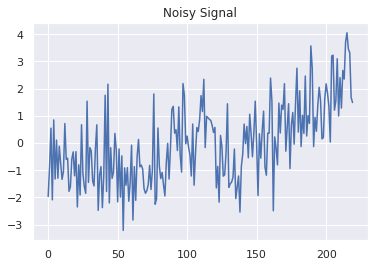

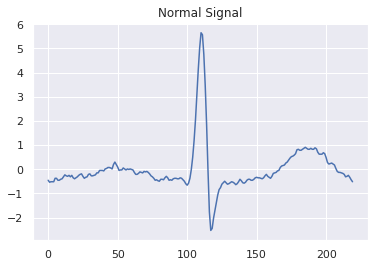

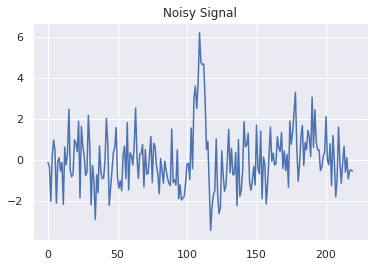

In [38]:
plt.plot(X_train[1])
plt.title('Normal Signal')
plt.show()
plt.plot(noise_train[1])
plt.title('Noisy Signal')
plt.show()

plt.plot(X_test[1])
plt.title('Normal Signal')
plt.show()
plt.plot(noise_test[1])
plt.title('Noisy Signal')
plt.show()

In [39]:
X_train1 = noise_train.reshape(noise_train.shape + (1,1))
X_test1 = noise_test.reshape(noise_test.shape + (1,1))

y_train1=to_categorical(y_train)
y_test1=to_categorical(y_test)

In [40]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

verbose, epoch, batch_size = 1, 5, 64
activationFunction='relu'

def getModel():
    
    cnnmodel = Sequential()
    cnnmodel.add(Conv1D(filters=128, kernel_size=16,padding='same', activation='relu',input_shape=(X_train1.shape[1],1)))
    cnnmodel.add(BatchNormalization())
    cnnmodel.add(Conv1D(filters=32, kernel_size=16,padding='same', activation='relu'))
    cnnmodel.add(BatchNormalization())
    cnnmodel.add(Conv1D(filters=9, kernel_size=16,padding='same', activation='relu'))
    cnnmodel.add(MaxPooling1D(pool_size=2,padding='same'))
    cnnmodel.add(Flatten())
    cnnmodel.add(Dense(512, activation='relu'))
    cnnmodel.add(Dense(128, activation='relu'))
    cnnmodel.add(Dense(32, activation='relu'))
    cnnmodel.add(Dense(9, activation='softmax'))
    cnnmodel.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    cnnmodel.summary()
    return cnnmodel

cnnmodel = getModel()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 220, 128)          2176      
_________________________________________________________________
batch_normalization_4 (Batch (None, 220, 128)          512       
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 220, 32)           65568     
_________________________________________________________________
batch_normalization_5 (Batch (None, 220, 32)           128       
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 220, 9)            4617      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 110, 9)            0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 990)              

In [41]:
modelhistory= cnnmodel.fit(X_train1[:,:,:,0], y_train1, epochs=epoch, verbose=verbose, validation_split=0.2, batch_size = batch_size)

Train on 25529 samples, validate on 6383 samples
Epoch 1/5
25280/25529 [============================>.] - ETA: 0s - loss: 0.6805 - accuracy: 0.7588

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


25529/25529 [==============================] - 3s 134us/sample - loss: 0.6778 - accuracy: 0.7597 - val_loss: 0.4909 - val_accuracy: 0.8259
Epoch 2/5
25529/25529 [==============================] - 3s 111us/sample - loss: 0.4230 - accuracy: 0.8509 - val_loss: 0.4646 - val_accuracy: 0.8491
Epoch 3/5
25529/25529 [==============================] - 3s 112us/sample - loss: 0.3423 - accuracy: 0.8775 - val_loss: 0.3844 - val_accuracy: 0.8667
Epoch 4/5
25529/25529 [==============================] - 3s 111us/sample - loss: 0.2998 - accuracy: 0.8899 - val_loss: 0.3643 - val_accuracy: 0.8778
Epoch 5/5
25529/25529 [==============================] - 3s 108us/sample - loss: 0.2504 - accuracy: 0.9075 - val_loss: 0.3929 - val_accuracy: 0.8737


In [42]:
cnnpredictions = cnnmodel.predict(X_test1[:,:,:,0], verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [43]:
from sklearn import metrics
cnn_predict=np.argmax(cnnpredictions,axis=1)
cnn_actual_value=np.argmax(y_test1,axis=1)
cnnmetrics = metrics.classification_report(cnn_actual_value, cnn_predict, digits=3)
print(cnnmetrics, 'CNN metrics')

              precision    recall  f1-score   support

           1      0.990     0.816     0.894     28703
           2      0.798     0.945     0.865      1660
           3      0.804     0.894     0.847      2500
           4      0.494     0.856     0.626      1199
           5      0.291     0.765     0.422       773
           6      0.117     0.808     0.205       193
           7      0.220     0.893     0.353       428
           8      0.990     0.945     0.967      2407

    accuracy                          0.836     37863
   macro avg      0.588     0.865     0.647     37863
weighted avg      0.926     0.836     0.867     37863
 CNN metrics


In [44]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

verbose, epoch, batch_size = 1, 5, 256
activationFunction='relu'

def getlstmModel():
    
    lstmmodel = Sequential()
    lstmmodel.add(LSTM(128, return_sequences=True, input_shape=(X_train1.shape[1],1)))
    lstmmodel.add(LSTM(9, return_sequences=True))
    lstmmodel.add(MaxPooling1D(pool_size=2))
    lstmmodel.add(Flatten())
    lstmmodel.add(Dense(512, activation=tf.nn.relu))    
    lstmmodel.add(Dense(128, activation=tf.nn.relu))    
    lstmmodel.add(Dense(32, activation=tf.nn.relu))
    lstmmodel.add(Dense(9, activation='softmax'))
    lstmmodel.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    lstmmodel.summary()
    return lstmmodel

lstmmodel = getlstmModel()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 220, 128)          66560     
_________________________________________________________________
lstm_5 (LSTM)                (None, 220, 9)            4968      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 110, 9)            0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 990)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               507392    
_________________________________________________________________
dense_21 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_22 (Dense)             (None, 32)               

In [45]:
lstmmodelhistory= lstmmodel.fit(X_train1[:,:,:,0], y_train1, epochs=epoch, verbose=verbose, validation_split=0.2, batch_size = batch_size)

Train on 25529 samples, validate on 6383 samples
Epoch 1/5
25529/25529 [==============================] - ETA: 0s - loss: 0.8792 - accuracy: 0.6923

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


25529/25529 [==============================] - 34s 1ms/sample - loss: 0.8792 - accuracy: 0.6923 - val_loss: 0.5646 - val_accuracy: 0.7999
Epoch 2/5
25529/25529 [==============================] - 32s 1ms/sample - loss: 0.4953 - accuracy: 0.8280 - val_loss: 0.4432 - val_accuracy: 0.8482
Epoch 3/5
25529/25529 [==============================] - 32s 1ms/sample - loss: 0.4039 - accuracy: 0.8607 - val_loss: 0.4044 - val_accuracy: 0.8612
Epoch 4/5
25529/25529 [==============================] - 32s 1ms/sample - loss: 0.3610 - accuracy: 0.8721 - val_loss: 0.3790 - val_accuracy: 0.8693
Epoch 5/5
25529/25529 [==============================] - 33s 1ms/sample - loss: 0.3199 - accuracy: 0.8857 - val_loss: 0.3577 - val_accuracy: 0.8765


In [46]:
lstmpredictions = lstmmodel.predict(X_test1[:,:,:,0], verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [47]:
lstm_predict=np.argmax(lstmpredictions,axis=1)
lstm_actual_value=np.argmax(y_test1,axis=1)
lstmmetrics = metrics.classification_report(lstm_actual_value, lstm_predict, digits=3)
print(lstmmetrics, 'lstm metrics')

              precision    recall  f1-score   support

           1      0.992     0.770     0.867     28703
           2      0.810     0.943     0.872      1660
           3      0.836     0.915     0.874      2500
           4      0.492     0.884     0.632      1199
           5      0.202     0.814     0.324       773
           6      0.070     0.808     0.130       193
           7      0.337     0.799     0.474       428
           8      0.978     0.974     0.976      2407

    accuracy                          0.805     37863
   macro avg      0.590     0.863     0.643     37863
weighted avg      0.928     0.805     0.848     37863
 lstm metrics
